In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt

In [5]:
strain = pd.read_csv('SalaryData_Test.csv')

In [8]:
strain.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [9]:
from sklearn.naive_bayes import GaussianNB

In [10]:
from sklearn.naive_bayes import MultinomialNB

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
dftr=pd.DataFrame(strain)

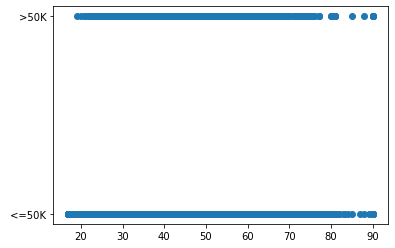

In [14]:
plt.scatter(dftr.age,dftr.Salary)

In [15]:
# create dummies for sex
dummies = pd.get_dummies(dftr['sex']).rename(columns=lambda x: 'sex_' + str(x))
# bring the dummies back into the original dataset
dftr = pd.concat([dftr, dummies], axis=1)
print(dftr)

       age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race 

In [16]:
# create dummies for maritalstatus
dummies = pd.get_dummies(dftr['maritalstatus']).rename(columns=lambda x: 'maritalstatus_' + str(x))
# bring the dummies back into the original dataset
dftr = pd.concat([dftr, dummies], axis=1)
print(dftr)

       age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race 

In [18]:
dftr.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary', 'sex_ Female',
       'sex_ Male', 'maritalstatus_ Divorced',
       'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed'],
      dtype='object')

In [19]:
# Hence required columns we are considering and building the model

In [20]:
col = list(dftr.columns)[1:3]
dftr.drop(col, axis=1, inplace=True)

In [21]:
col = list(dftr.columns)[2:11]
dftr.drop(col, axis=1, inplace=True)

In [22]:
dftr.columns

Index(['age', 'educationno', 'Salary', 'sex_ Female', 'sex_ Male',
       'maritalstatus_ Divorced', 'maritalstatus_ Married-AF-spouse',
       'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed'],
      dtype='object')

In [23]:
dftr.shape

(15060, 12)

In [24]:
ip_columns = ['age','educationno','sex_ Female','sex_ Male','maritalstatus_ Divorced','maritalstatus_ Married-AF-spouse','maritalstatus_ Married-civ-spouse','maritalstatus_ Married-spouse-absent','maritalstatus_ Never-married','maritalstatus_ Separated','maritalstatus_ Widowed']
op_column = ['Salary']

In [25]:
# Splitting data into train and test
Xtrain,Xtest,ytrain,ytest = train_test_split(dftr[ip_columns],dftr[op_column],test_size=0.3, random_state=0)


In [27]:
ignb = GaussianNB()
imnb = MultinomialNB()

In [28]:
# Building and predicting at the same time 
pred_gnb = ignb.fit(Xtrain,ytrain).predict(Xtest)
pred_mnb = imnb.fit(Xtrain,ytrain).predict(Xtest)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [29]:
# Confusion matrix GaussianNB model
confusion_matrix(ytest,pred_gnb) # GaussianNB model
pd.crosstab(ytest.values.flatten(),pred_gnb) # confusion matrix using 
np.mean(pred_gnb==ytest.values.flatten()) # 71.89%

0.7248782647189022

In [30]:
# Confusion matrix multinomialNB model
confusion_matrix(ytest,pred_mnb) # multinomialNB model
pd.crosstab(ytest.values.flatten(),pred_mnb) # confusion matrix using 
np.mean(pred_mnb==ytest.values.flatten()) # 71.52%

0.7268702965914121

In [31]:
confusion_matrix(ytest,pred_mnb) # multinomailNB model

array([[2413,  972],
       [ 262,  871]], dtype=int64)

In [32]:
confusion_matrix(ytest,pred_gnb) # GaussianNB model

array([[2335, 1050],
       [ 193,  940]], dtype=int64)

In [33]:
help(GaussianNB())

Help on GaussianNB in module sklearn.naive_bayes object:

class GaussianNB(_BaseNB)
 |  GaussianNB(*, priors=None, var_smoothing=1e-09)
 |  
 |  Gaussian Naive Bayes (GaussianNB)
 |  
 |  Can perform online updates to model parameters via :meth:`partial_fit`.
 |  For details on algorithm used to update feature means and variance online,
 |  see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:
 |  
 |      http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
 |  
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  priors : array-like of shape (n_classes,)
 |      Prior probabilities of the classes. If specified the priors are not
 |      adjusted according to the data.
 |  
 |  var_smoothing : float, default=1e-9
 |      Portion of the largest variance of all features that is added to
 |      variances for calculation stability.
 |  
 |      .. versionadded:: 0.20
 |  
 |  Attributes
 |  ----------
 |  

In [34]:
# CONCLUSION : My GaussianNB model and  multinomialNB model given 71.5 % Accuracy So Bagging Technique applied om my both the models that accuracy is 73% and Also Adaptive Boosting Tecnique Given  79% Accuracy